### **1- Análisis de normalidad con python**

Los análisis de normalidad, también llamados contrastes de normalidad, tienen como objetivo analizar si los datos disponibles podrían proceder de una población con una distribución normal. Existen tres estrategias principales abordar este análisis:

- Representaciones gráficas
- Métodos analíticos
- Test de hipótesis.

Uno de los ejemplos más empleados cuando se habla de variables aleatorias que siguen una distribución normal es la altura de las personas. Esta afirmación no es arbitraria, los procesos cuyo resultado es la suma de muchas pequeñas interacciones suelen converger en una distribución normal. La altura de una persona, es el resultado de miles de factores que se suman unos a otros condicionando el crecimiento.

A lo largo del siguiente documento se muestra como utilizar diferentes estrategias para determinar si la altura de un conjunto de personas sigue una distribución normal.

#### **`Librerias`**

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### **`Datos`**

In [3]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años.

In [4]:
datos = datos[(datos.age > 15) & (datos.male == 0)]
peso = datos['weight']
peso

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062497
Name: weight, Length: 198, dtype: float64

#### **`Métodos gráficos`**

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

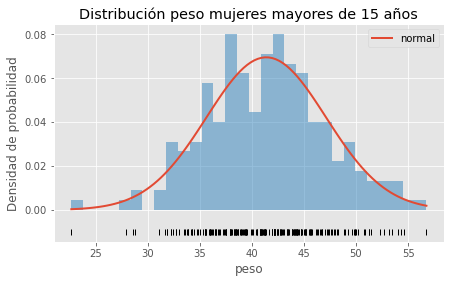

In [5]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(peso, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

**`Gráfico Q-Q`**

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos **`(Gráficos Q-Q)`**. Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

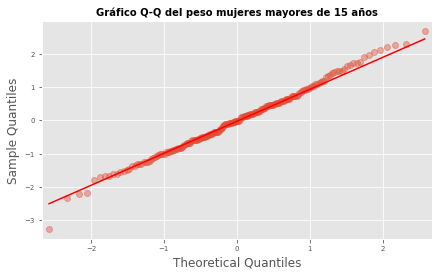

In [6]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

El análisis gráfico parece indicar que los datos siguen una distribución normal.